In [4]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
#LOAD THE DATASET
Country_wise = pd.read_excel('country_wise_latest (1).xlsx')
Country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


### Observations
- I read the dataset and checked for the first five rows

In [8]:
#To check if there are missing values
Country_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

### Observations
- From the dataset, we have 4 floats, 9 integers and 2 objects

In [13]:
#To check the shape of the dataset
Country_wise.shape

(187, 15)

### Obsevations
- From the dataset, there are 187 rows and 15 columns.

In [14]:
#Checking the Statistical Analysis
Country_wise.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,187.0,8.813094e+04,383318.663831,10.00,1114.000,5059.00,40460.500,4290259.00
Deaths,187.0,3.497519e+03,14100.002482,0.00,18.500,108.00,734.000,148011.00
Recovered,187.0,5.063148e+04,190188.189643,0.00,626.500,2815.00,22606.000,1846641.00
Active,187.0,3.400194e+04,213326.173371,0.00,141.500,1600.00,9149.000,2816444.00
New cases,187.0,1.222957e+03,5710.374790,0.00,4.000,49.00,419.500,56336.00
New deaths,187.0,2.895722e+01,120.037173,0.00,0.000,1.00,6.000,1076.00
New recovered,187.0,9.338128e+02,4197.719635,0.00,0.000,22.00,221.000,33728.00
Deaths / 100 Cases,187.0,3.019519e+00,3.454302,0.00,0.945,2.15,3.875,28.56
Recovered / 100 Cases,187.0,6.482053e+01,26.287694,0.00,48.770,71.32,86.885,100.00
Deaths / 100 Recovered,187.0,inf,NaN,0.00,1.450,3.62,6.440,inf


### Observations 
- From the dataset, there 187 observations.
- The confrimed cases ranges from 10 to 4290259.
- The average number of confirmed cases is far from the 75% percentile.
- The standard deviation of confirmed cases is higher than that of others.

### EXPLORATORY DATA ANALYSIS

## `Univariate Analysis`

<Axes: xlabel='Confirmed', ylabel='Count'>

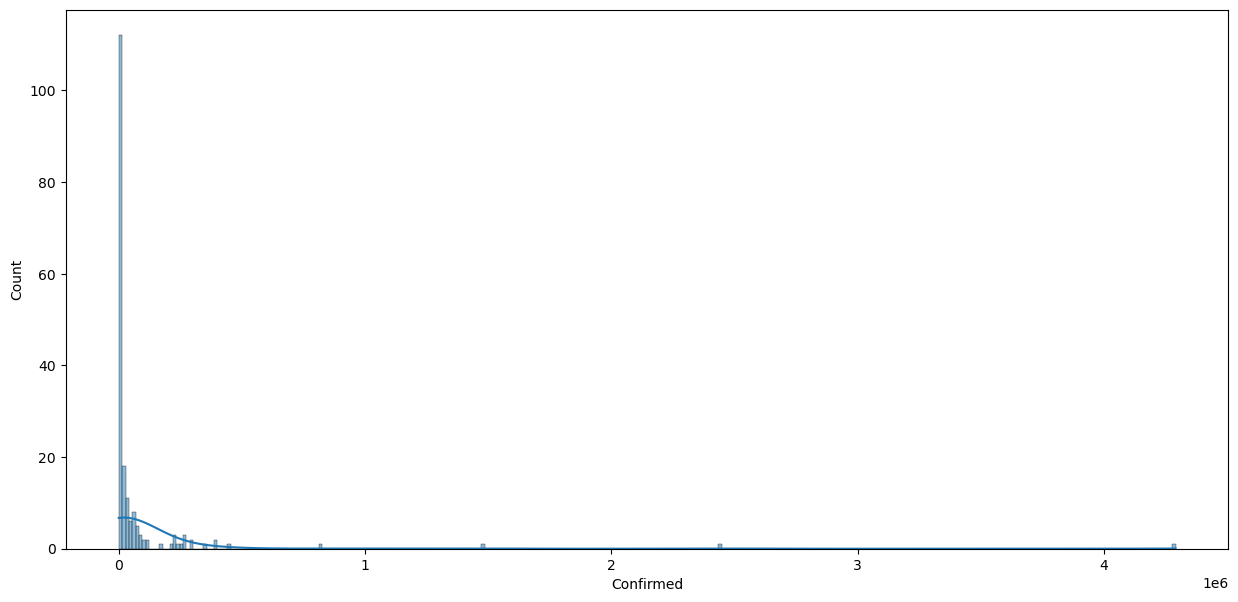

In [15]:
plt.figure(figsize=(15,7)) #Shows the size of the graph
sns.histplot(data= Country_wise, x='Confirmed', kde= True)

<Axes: xlabel='Confirmed'>

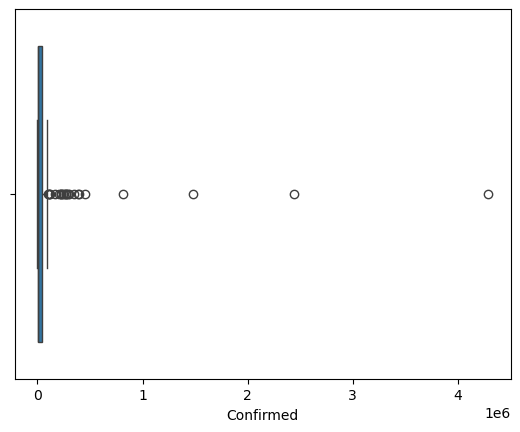

In [16]:
sns.boxplot(data= Country_wise, x='Confirmed')

### Observations
- The distribution is right skewed with a lot of outliers

<Axes: xlabel='Deaths', ylabel='Count'>

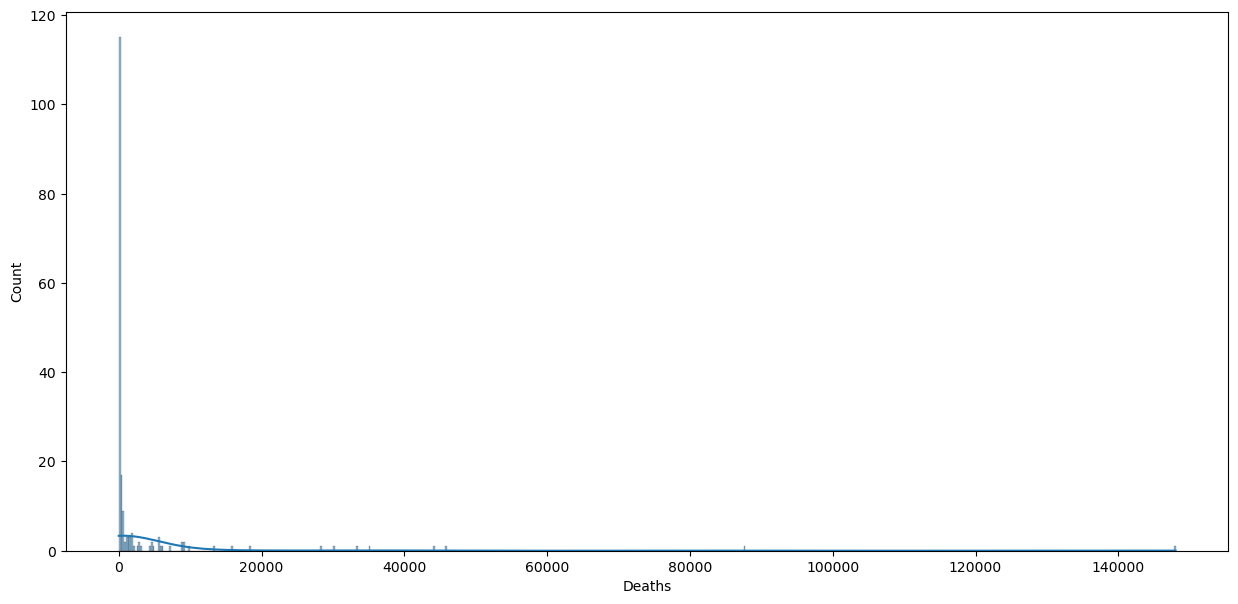

In [17]:
plt.figure(figsize=(15,7))
sns.histplot(data= Country_wise, x='Deaths', kde= True)

<Axes: xlabel='Deaths'>

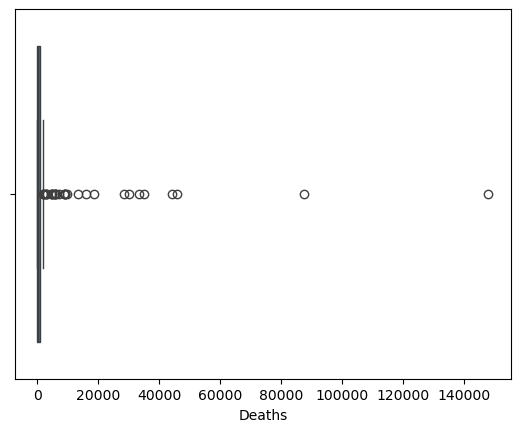

In [18]:
sns.boxplot(data= Country_wise, x='Deaths')


### Observations
- The number of Deaths ranges from 0 to 140000.
- The distribution is right skewed with outliers.

<Axes: xlabel='Recovered', ylabel='Count'>

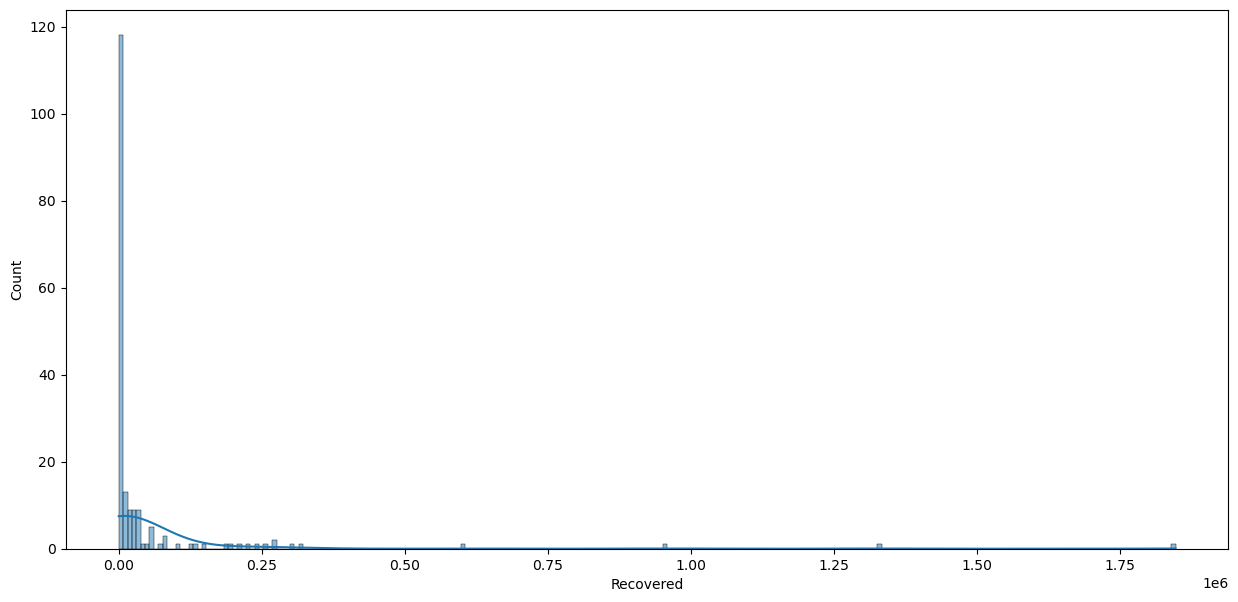

In [19]:
plt.figure(figsize=(15,7))
sns.histplot(data= Country_wise, x='Recovered', kde= True)

<Axes: xlabel='Recovered'>

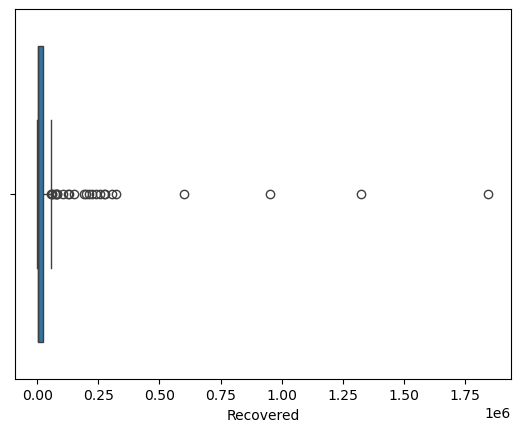

In [20]:
sns.boxplot(data= Country_wise, x='Recovered')

### Observations
- The distribution is right skewed with lots of outliers.

<Axes: xlabel='Active', ylabel='Count'>

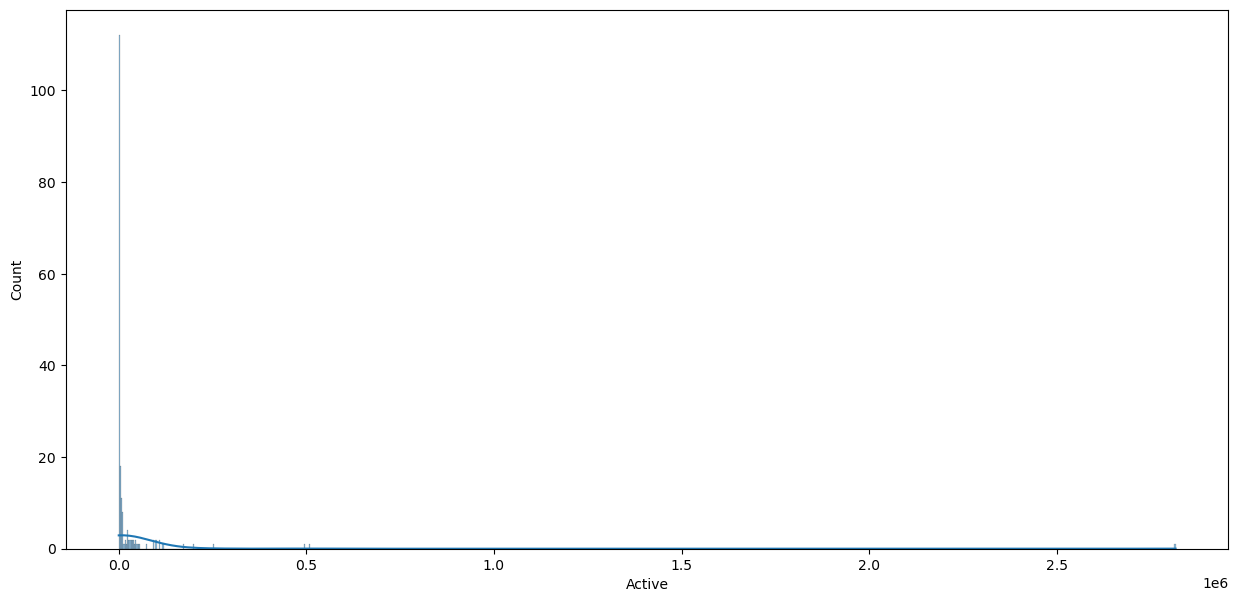

In [21]:
plt.figure(figsize=(15,7))
sns.histplot(data= Country_wise, x='Active', kde= True)

<Axes: xlabel='Active'>

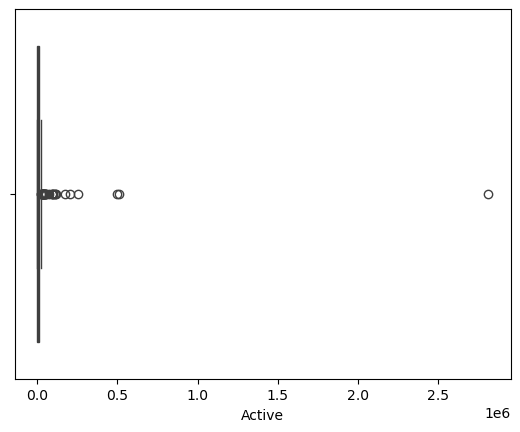

In [23]:
sns.boxplot(data= Country_wise, x='Active')

### Observations 
- The distribution is right skewed with lots of outliers

<Axes: xlabel='New cases', ylabel='Count'>

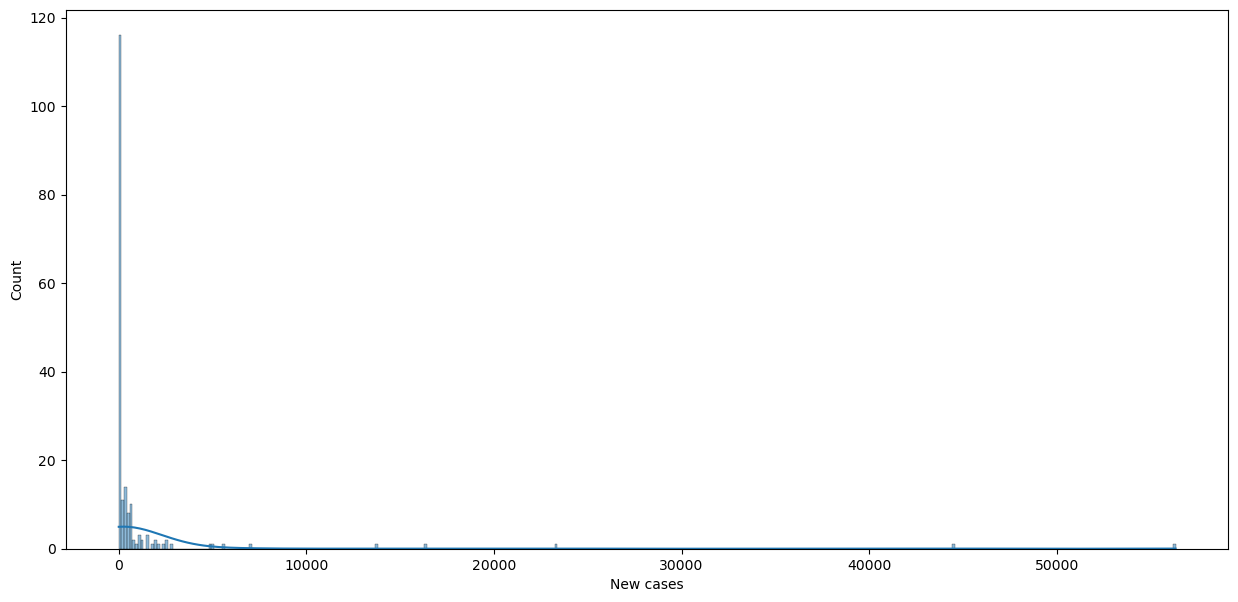

In [24]:
plt.figure(figsize=(15,7))
sns.histplot(data= Country_wise, x='New cases', kde= True)

### Observations
- The number of new cases ranges from 0 to 5000.
- The distribution is right skewed with outliers.

<Axes: xlabel='New cases'>

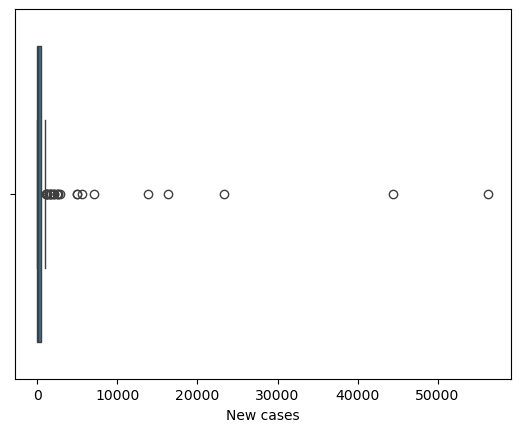

In [25]:
sns.boxplot(data= Country_wise, x='New cases')

<Axes: xlabel='New deaths', ylabel='Count'>

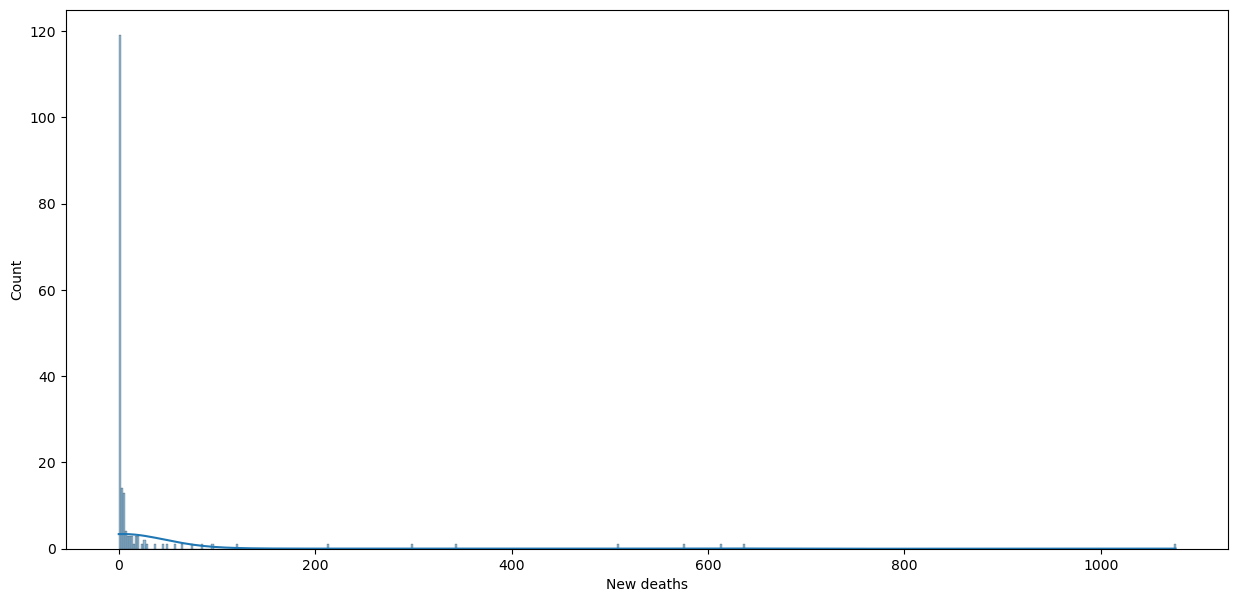

In [26]:
plt.figure(figsize=(15,7))
sns.histplot(data= Country_wise, x='New deaths', kde= True)

<Axes: xlabel='New deaths'>

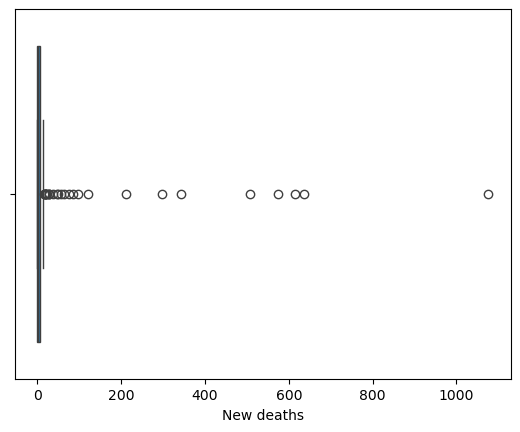

In [27]:
sns.boxplot(data= Country_wise, x='New deaths')

### Observations
- The distribution is right skewed with outliers
- The number of new deaths ranges from 0 to 100

<Axes: xlabel='New recovered', ylabel='Count'>

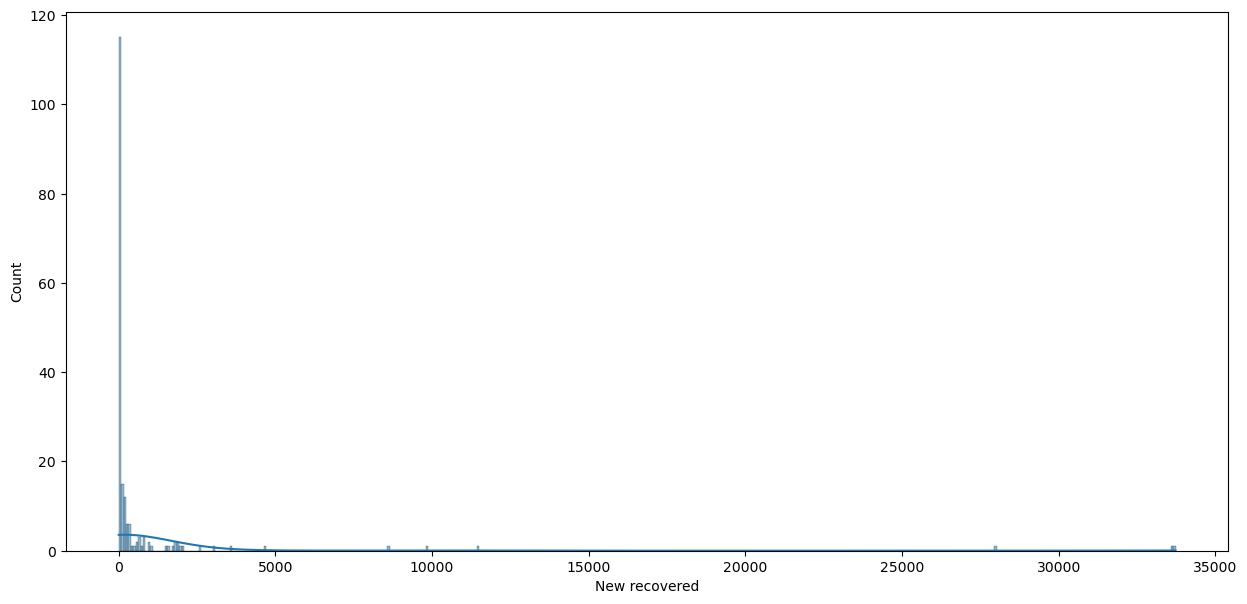

In [69]:
plt.figure(figsize=(15,7))
sns.histplot(data= country_wise, x='New recovered', kde= True)

<Axes: xlabel='New recovered'>

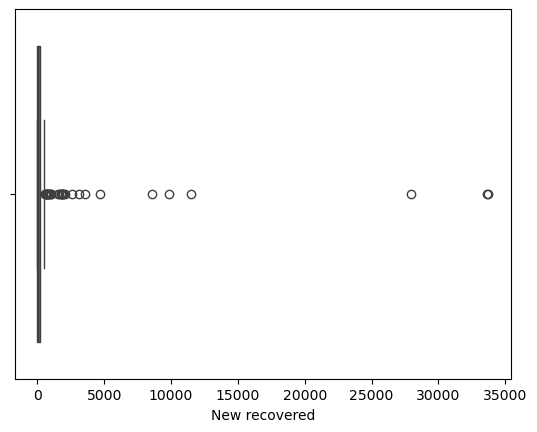

In [28]:
sns.boxplot(data= Country_wise, x='New recovered')


### Observations
- The number of new recovered ranges from 0 to 5000
- The distribution is right skewed with outliers

<Axes: xlabel='Deaths / 100 Cases', ylabel='Count'>

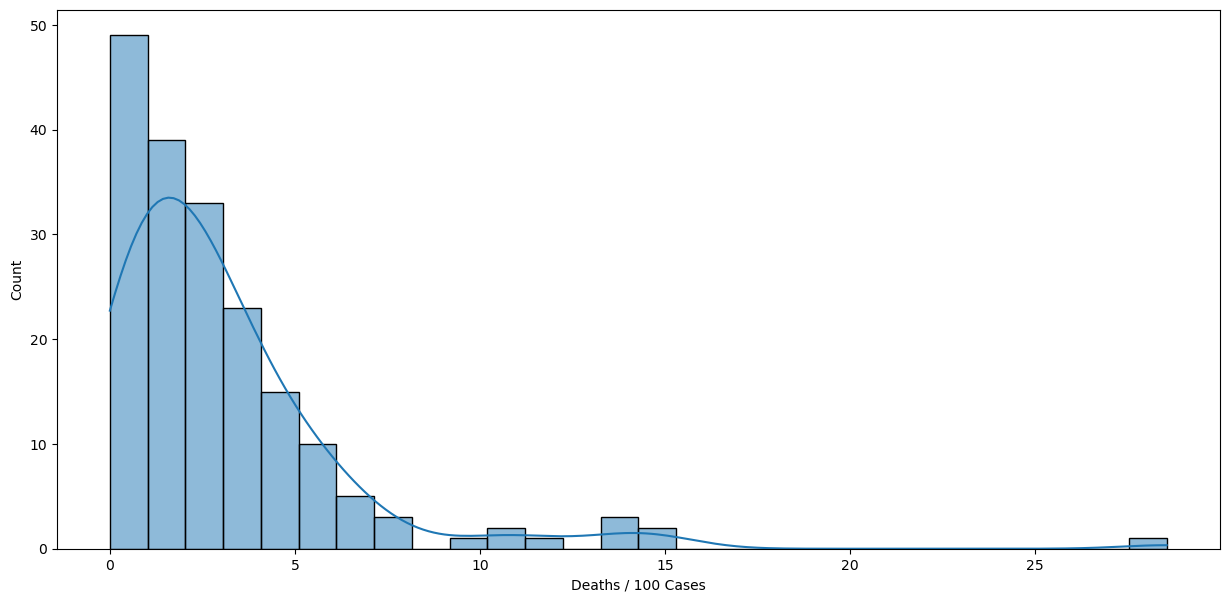

In [29]:
plt.figure(figsize=(15,7))
sns.histplot(data= Country_wise, x='Deaths / 100 Cases', kde= True)


<Axes: xlabel='Deaths / 100 Cases'>

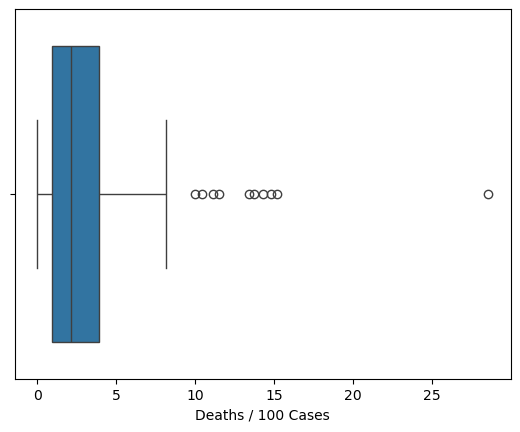

In [30]:
sns.boxplot(data= Country_wise, x='Deaths / 100 Cases')

<Axes: xlabel='Recovered / 100 Cases', ylabel='Count'>

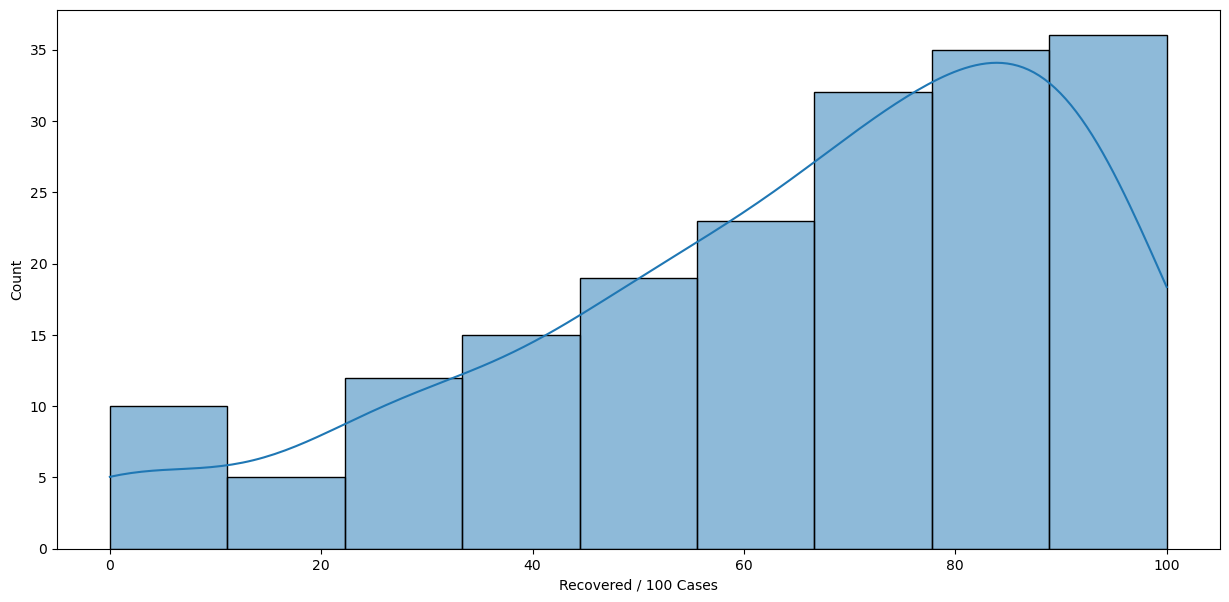

In [31]:
plt.figure(figsize=(15,7))
sns.histplot(data= Country_wise, x='Recovered / 100 Cases', kde= True)

<Axes: xlabel='Recovered / 100 Cases'>

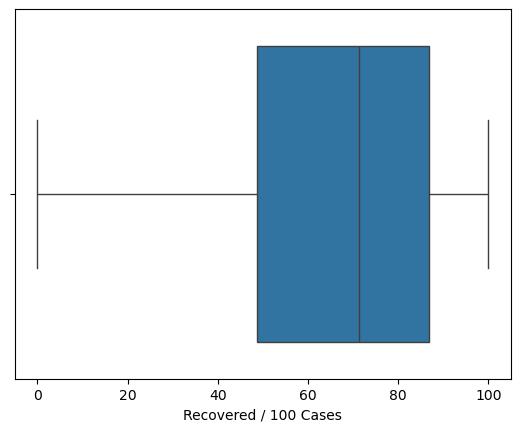

In [32]:
sns.boxplot(data= Country_wise, x='Recovered / 100 Cases')

### Observations
- The distribution is left skewed.
- The median of recovered / 100 cases is a little above 70%.

<Axes: xlabel='Deaths / 100 Recovered', ylabel='Count'>

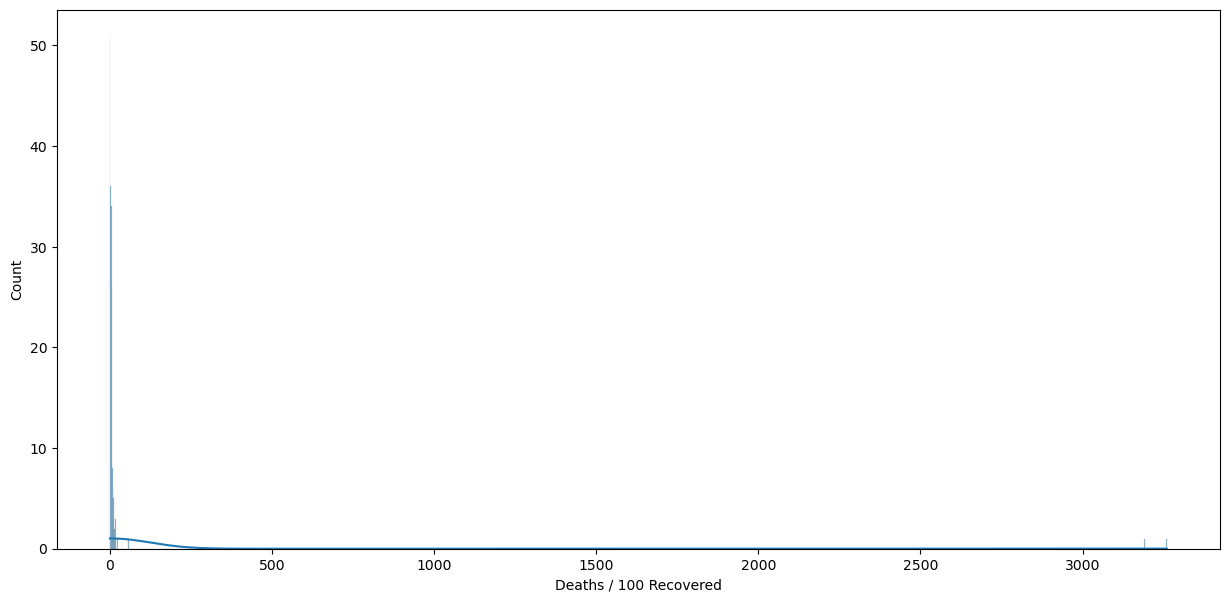

In [33]:
plt.figure(figsize=(15,7))
sns.histplot(data= Country_wise, x='Deaths / 100 Recovered', kde= True)


<Axes: xlabel='Deaths / 100 Recovered'>

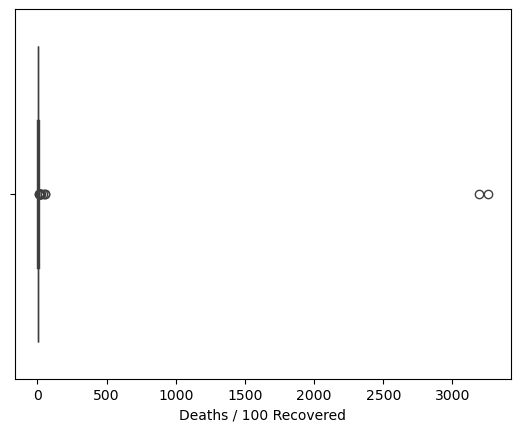

In [35]:
sns.boxplot(data= Country_wise, x='Deaths / 100 Recovered')

### Observations
- The distribution is right skewed with lots of outliers.

<Axes: xlabel='Confirmed last week', ylabel='Count'>

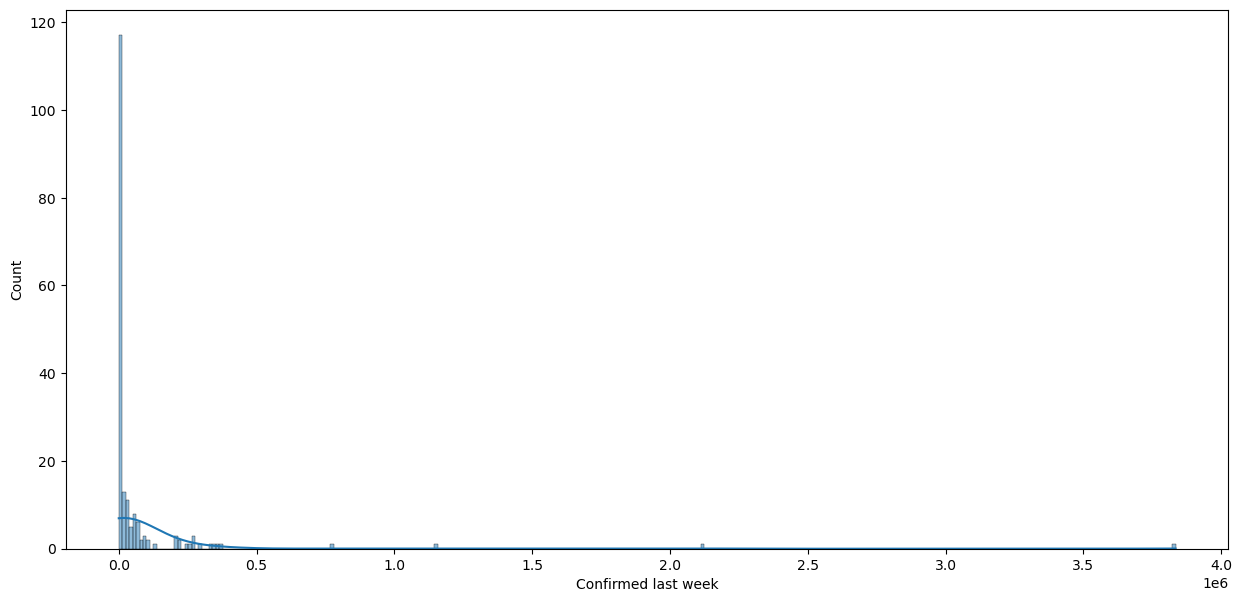

In [36]:
plt.figure(figsize=(15,7))
sns.histplot(data= Country_wise, x='Confirmed last week', kde= True)


<Axes: xlabel='Confirmed last week'>

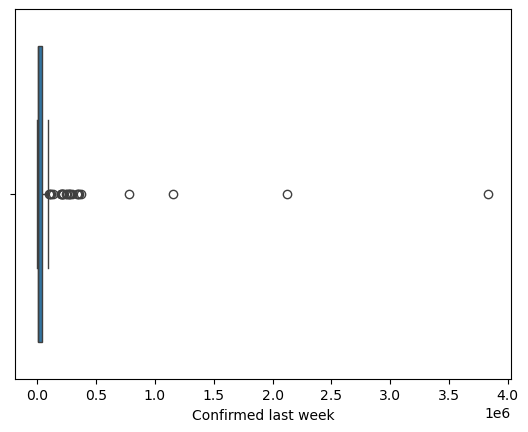

In [37]:
sns.boxplot(data= Country_wise, x='Confirmed last week')

### Observations
- The distribution is right skewed with many outliers

<Axes: xlabel='1 week change', ylabel='Count'>

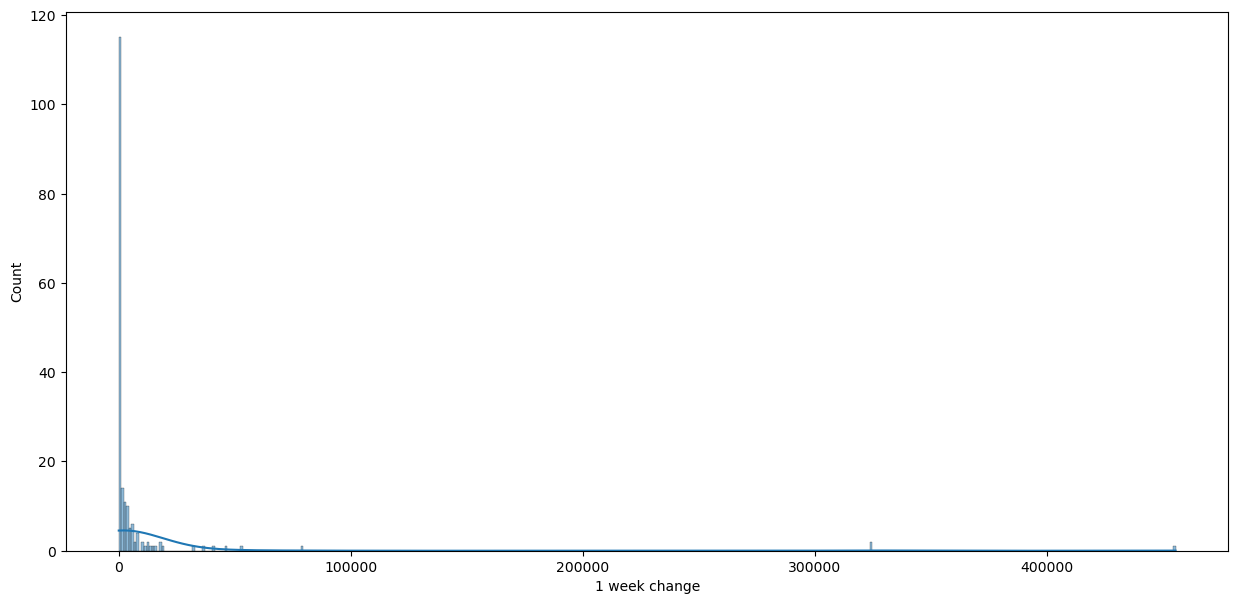

In [38]:
plt.figure(figsize=(15,7))
sns.histplot(data= Country_wise, x='1 week change', kde= True)


<Axes: xlabel='1 week change'>

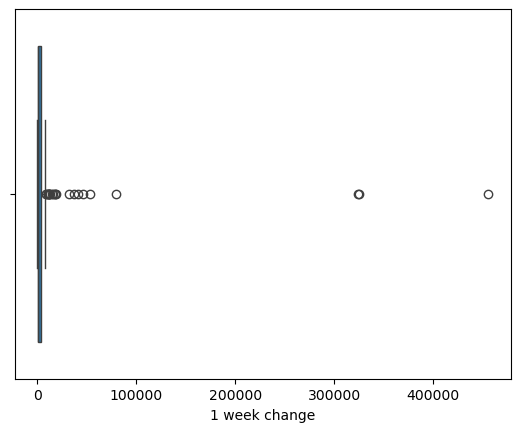

In [39]:
sns.boxplot(data= Country_wise, x='1 week change')

### Observations
- The distribution is right skewed
- It ranges from 0 to 50000

<Axes: xlabel='1 week % increase', ylabel='Count'>

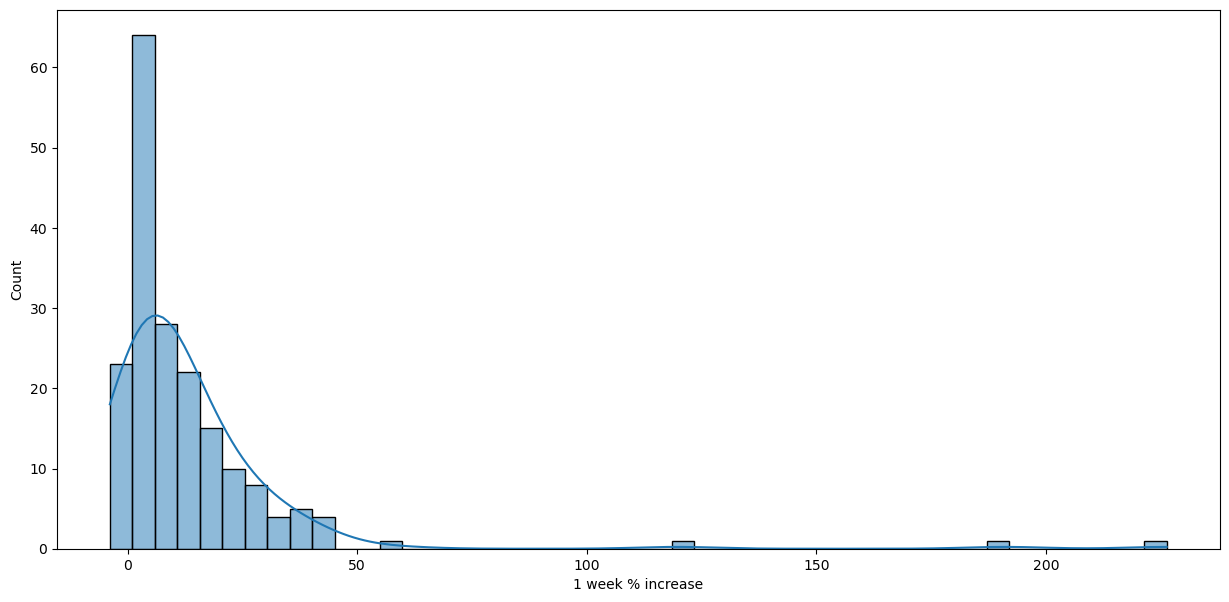

In [93]:
plt.figure(figsize=(15,7))
sns.histplot(data= country_wise, x='1 week % increase', kde= True)


<Axes: xlabel='1 week % increase'>

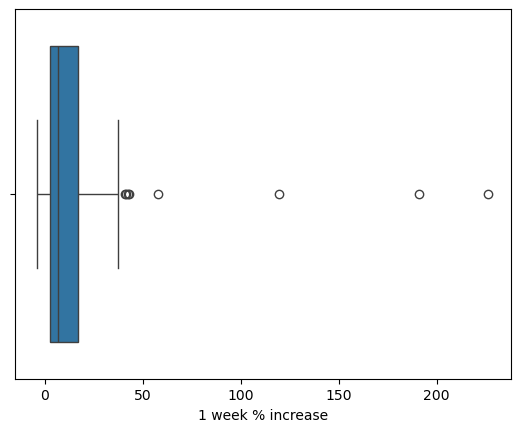

In [40]:
sns.boxplot(data= Country_wise, x='1 week % increase')

### Observations
- The distribution is right skewed

### MULTIVARIATE ANALYSIS

In [65]:
## Lets extract which country/region that has the maximum and minimum active of covid-19
top10_active= Country_wise.groupby('Country/Region').sum()[['Active']].sort_values('Active', ascending=False).reset_index().head(10) #top 10 country with maximum active of covid-19
top10_active

,Country/Region,Active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


<Figure size 2000x600 with 0 Axes>

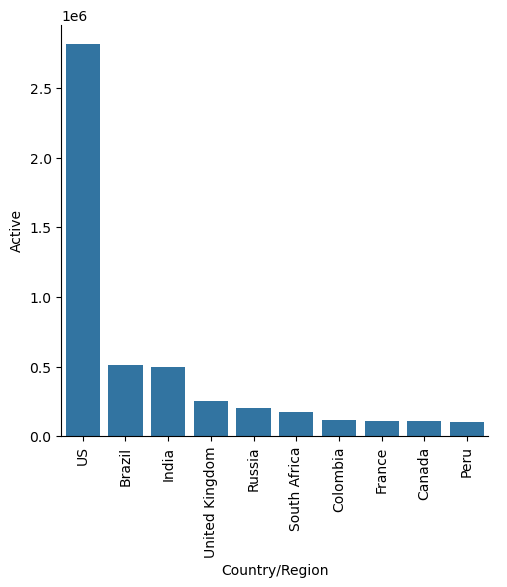

In [66]:
plt.figure(figsize=(20,6))
sns.catplot(data=top10_active,x= 'Country/Region', y= 'Active', kind='bar')
plt.xticks(rotation=90);

### Observations
-  
US has the highest number of active cases of covid-19-  
Brazil, India, United Kingdom and Russia also have high numbers of active cases of covid-19

In [68]:
bottom10_totalactive = Country_wise.groupby('Country/Region').sum()[['Active']].sort_values('Active', ascending=False).reset_index().tail(10) #top 10 country with minimum active of covid-19
bottom10_totalactive

,Country/Region,Active
177,Saint Kitts and Nevis,2
178,Mauritius,2
179,Western Sahara,1
180,Laos,1
181,Greenland,1
182,Holy See,0
183,San Marino,0
184,Brunei,0
185,Dominica,0
186,Grenada,0


<Figure size 2000x600 with 0 Axes>

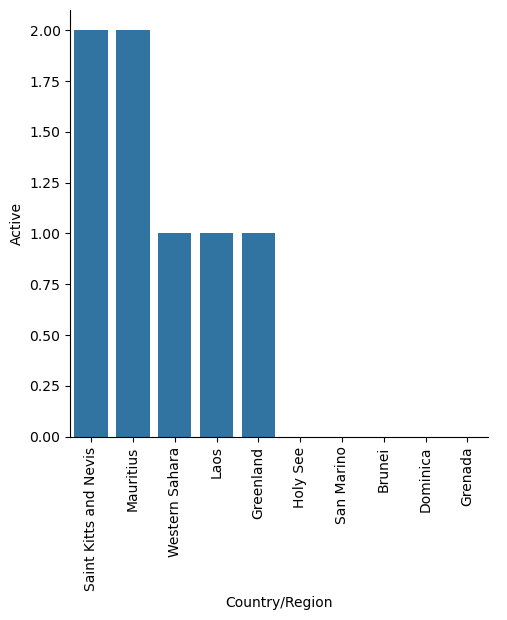

In [69]:
plt.figure(figsize=(20,6))
sns.catplot(data=bottom10_totalactive,x= 'Country/Region', y= 'Active', kind='bar')
plt.xticks(rotation=90);

### Observations
- Saint Kitts, Mauritius, Western Sahara, Laos and Greenland have relatively low active cases of covid-19 while
- Holy See, San Marino, Brunei, Dominica and Grenada have no active cases of covid-19

In [70]:
## Lets extract which country/region that has the maximum and confirmed cases of covid-19
top10_confirmed= Country_wise.groupby('Country/Region').sum()[['Confirmed']].sort_values('Confirmed', ascending=False).reset_index().head(10) #top 10 country with maximum confirmed cases of covid-19
top10_confirmed

,Country/Region,Confirmed
0,US,4290259
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606


<Figure size 2000x600 with 0 Axes>

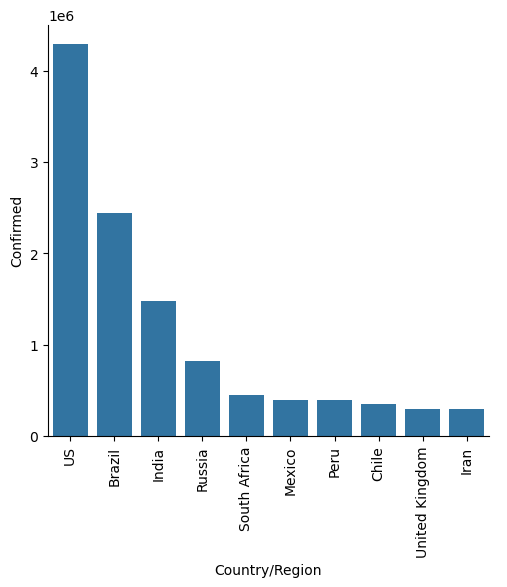

In [71]:
plt.figure(figsize=(20,6))
sns.catplot(data=top10_confirmed,x= 'Country/Region', y= 'Confirmed', kind='bar')
plt.xticks(rotation=90);

### Observations
- US has the highest number of confirmed cases followed by Brazil, India, Russia, South Africa and Mexico.

In [76]:
bottom10_totalconfirmed = Country_wise.groupby('Country/Region').sum()[['Confirmed']].sort_values('Confirmed', ascending=False).reset_index().tail(10) #top 10 country with minimum confirmed of covid-19
bottom10_totalconfirmed

,Country/Region,Confirmed
177,Fiji,27
178,Saint Lucia,24
179,Timor-Leste,24
180,Grenada,23
181,Laos,20
182,Dominica,18
183,Saint Kitts and Nevis,17
184,Greenland,14
185,Holy See,12
186,Western Sahara,10


<Figure size 2000x600 with 0 Axes>

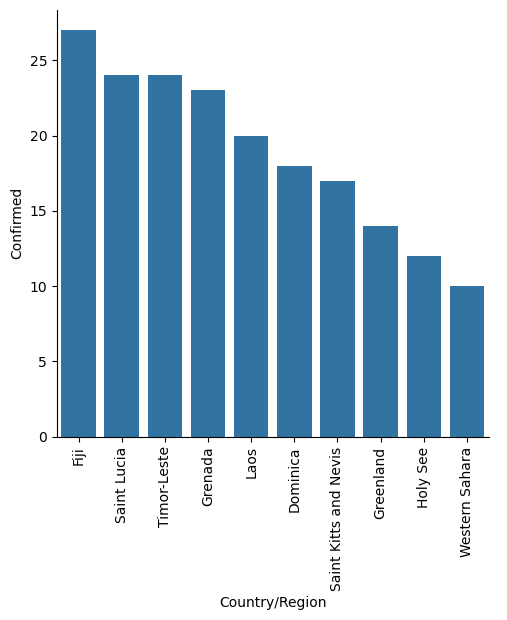

In [78]:
plt.figure(figsize=(20,6))
sns.catplot(data=bottom10_totalconfirmed,x= 'Country/Region', y= 'Confirmed', kind='bar')
plt.xticks(rotation=90);

### Observation
- Greenland, Holy See and Western Sahara have the least number of confirmed cases of covid-19

In [84]:
## Lets extract which country/region that has the maximum and minimum active of covid-19
top10_Deaths= Country_wise.groupby('Country/Region').sum()[['Deaths']].sort_values('Deaths', ascending=False).reset_index().head(10) #top 10 country with maximum deaths of covid-19
top10_Deaths

,Country/Region,Deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


<Figure size 2000x600 with 0 Axes>

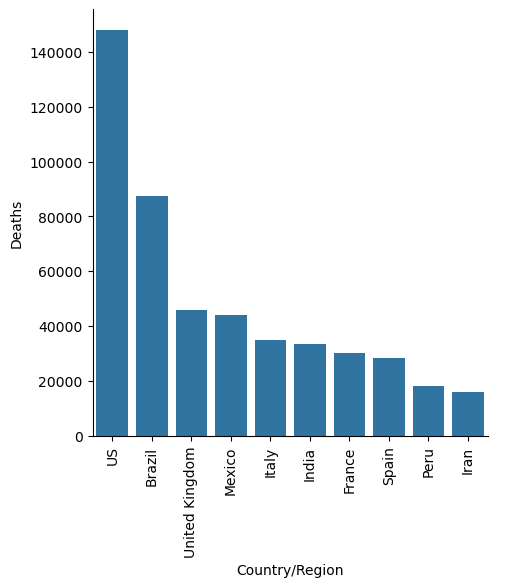

In [86]:
plt.figure(figsize=(20,6))
sns.catplot(data=top10_Deaths,x= 'Country/Region', y= 'Deaths', kind='bar')
plt.xticks(rotation=90);

### Observations
- US has the highest number of deaths cases of covid-19
- Brazil, United Kingdom, Mexico, Italy, India, France and Spain also have high cases of deaths

In [87]:
bottom10_totalDeaths= Country_wise.groupby('Country/Region').sum()[['Deaths']].sort_values('Deaths', ascending=False).reset_index().tail(10) #top 10 country with minimum deaths of covid-19
bottom10_totalDeaths

,Country/Region,Deaths
177,Saint Kitts and Nevis,0
178,Saint Lucia,0
179,Holy See,0
180,Saint Vincent and the Grenadines,0
181,Seychelles,0
182,Laos,0
183,Greenland,0
184,Cambodia,0
185,Grenada,0
186,Mongolia,0


<Figure size 2000x600 with 0 Axes>

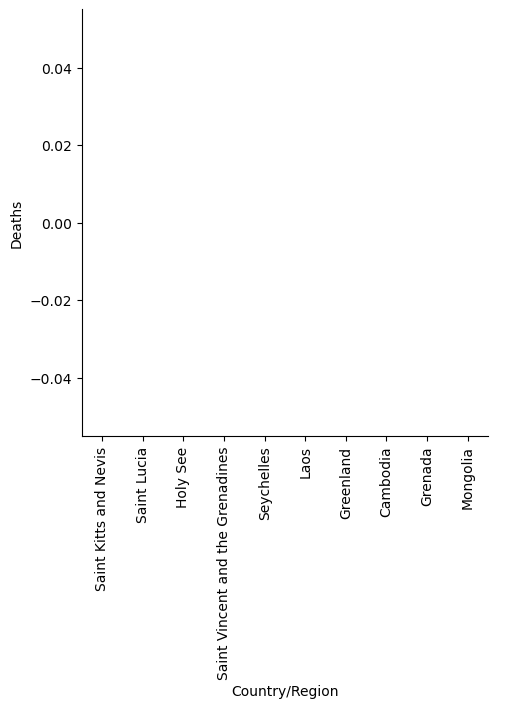

In [88]:
plt.figure(figsize=(20,6))
sns.catplot(data=bottom10_totalDeaths,x= 'Country/Region', y= 'Deaths', kind='bar')
plt.xticks(rotation=90);

### Observations
- Seychelles, Laos and others has no cases of deaths

In [92]:
## Lets extract which country/region that has the maximum and recovered cases of covid-19
top10_Recovered= Country_wise.groupby('Country/Region').sum()[['Recovered']].sort_values('Recovered', ascending=False).reset_index().head(10) #top 10 country with maximum recovered cases of covid-19
top10_Recovered

,Country/Region,Recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


<Figure size 2000x600 with 0 Axes>

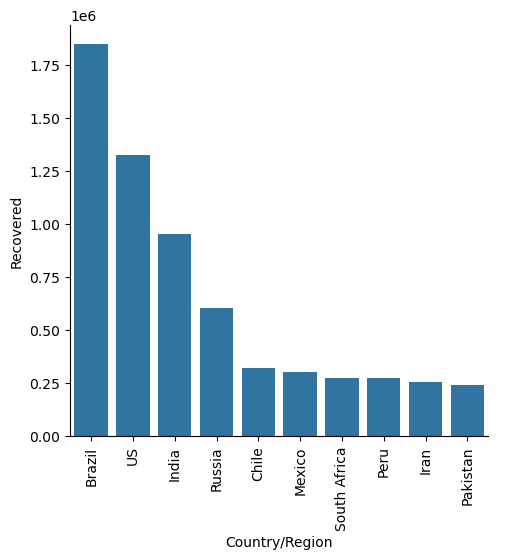

In [95]:
plt.figure(figsize=(20,6))
sns.catplot(data=top10_Recovered,x= 'Country/Region', y= 'Recovered', kind='bar')
plt.xticks(rotation=90);

### Observations
- Brazil, US, India and Russia have the highest recovered cases of covid-19

In [97]:
bottom10_totalRecovered= Country_wise.groupby('Country/Region').sum()[['Recovered']].sort_values('Recovered', ascending=False).reset_index().tail(10) #top 10 country with minimum recovered of covid-19
bottom10_totalRecovered

,Country/Region,Recovered
177,Greenland,13
178,Holy See,12
179,Papua New Guinea,11
180,Western Sahara,8
181,Mozambique,0
182,Canada,0
183,Timor-Leste,0
184,Serbia,0
185,Syria,0
186,Sweden,0


<Figure size 2000x600 with 0 Axes>

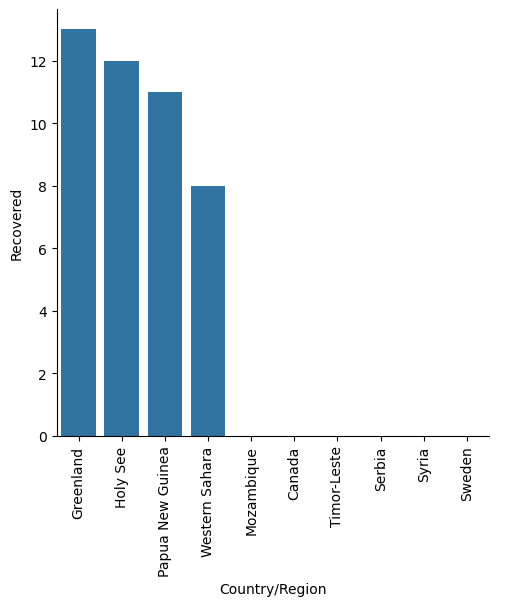

In [98]:
plt.figure(figsize=(20,6))
sns.catplot(data=bottom10_totalRecovered,x= 'Country/Region', y= 'Recovered', kind='bar')
plt.xticks(rotation=90);

### Observations
- Greenland, Holysee, Papua New Guinea and Western Sahara have the least recovered cases of covid-19
- Mozambique, Canada, Timor-Leste, Serbia, Syria and Sweden have zero recovered cases of covid-19


In [9]:
#Grouping the data by WHO Region and calculating the sum of Confirmed, Deaths and Recovered Cases
WHO_region_data = Country_wise.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
WHO_region_data

,WHO Region,Confirmed,Deaths,Recovered
0,Africa,723207,12223,440645
1,Americas,8839286,342732,4468616
2,Eastern Mediterranean,1490744,38339,1201400
3,Europe,3299523,211144,1993723
4,South-East Asia,1835297,41349,1156933
5,Western Pacific,292428,8249,206770


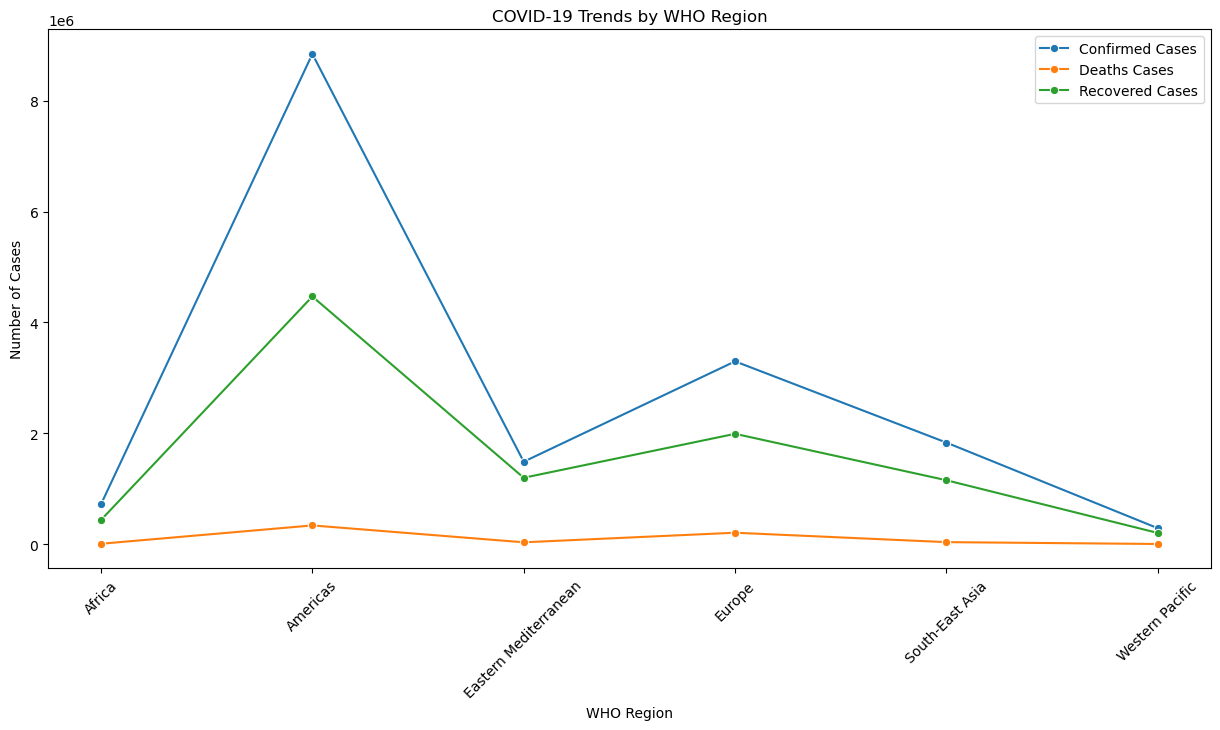

In [42]:
#Plotting trends for Confrimed, Deaths and Recovered Cases by WHO Region
plt.figure(figsize= (15,7))
sns.lineplot(data = WHO_region_data, x ='WHO Region', y = 'Confirmed', label = 'Confirmed Cases', marker = 'o')
sns.lineplot(data = WHO_region_data, x ='WHO Region', y = 'Deaths', label = 'Deaths Cases', marker = 'o')
sns.lineplot(data = WHO_region_data, x ='WHO Region', y = 'Recovered', label = 'Recovered Cases', marker = 'o')

plt.title('COVID-19 Trends by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Number of Cases')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

### Observations
- The number of confirmed cases in Americas is more than the number of recovered cases.
- The Western Pacific has the least confrimed cases.

In [43]:
#Calculating the correlation matrix
correlation_matrix = Country_wise[['Confirmed', 'Deaths', 'Recovered', 'Active', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', '1 week % increase']].corr()
correlation_matrix

,Confirmed,Deaths,Recovered,Active,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.063550,-0.064815,0.025175,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.251565,-0.114529,0.169006,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.048438,0.026610,-0.027277,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.054380,-0.132618,0.058386,-0.003752
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,1.000000,-0.168920,0.334594,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.168920,1.000000,-0.295381,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,0.334594,-0.295381,1.000000,-0.049083
1 week % increase,-0.010161,-0.034708,-0.013697,-0.003752,-0.134534,-0.394254,-0.049083,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

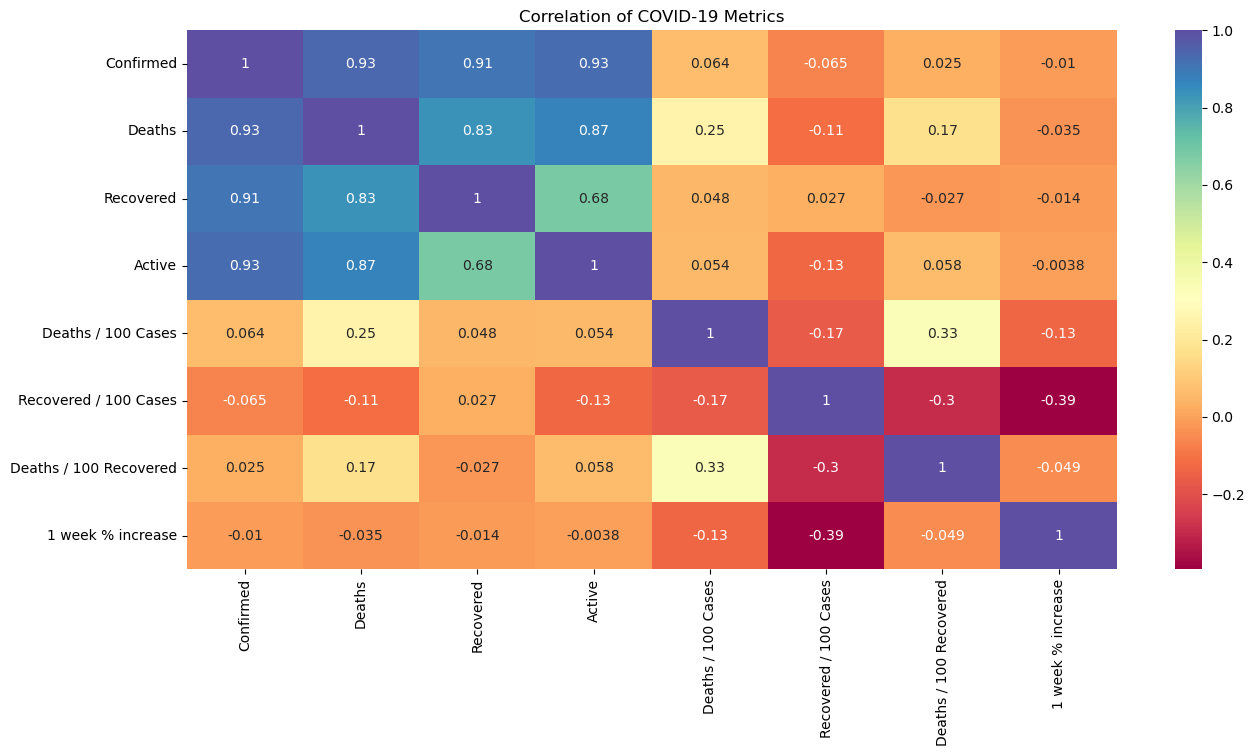

In [45]:
#Plotting the heatmap for correlation matrix
plt.figure(figsize= (15,7))
sns.heatmap(correlation_matrix, annot = True, cmap = 'Spectral')
plt.title('Correlation of COVID-19 Metrics')
plt.show


### Observations
- The number of confirmed cases has high correlation with number of deaths.
- The number of confirmed cases correlates with the number of active cases.
- Recovered and deaths has a strong correlation while other case scenarios do not correlate e.g Deaths / 100 Cases.

#### BUILDING MODEL

In [17]:
#Define features and targets
features = ['Confirmed', 'Deaths', 'Recovered', 'New cases', 'New deaths', 'New recovered']
X =  Country_wise[features] #Feature variables
y =  Country_wise['Active'] #Target variable(Active cases)
#Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


### Observations
- The 6 features such as Confirmed, Deaths, Recovered, New cases, New deaths and New recovered were selected because they correlate with the numbe rof active cases, therefore my focus will be on them.
- 80% will be used to train while 20% to test.

In [18]:
#Initialize and train the linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Observations
- The linear Regression model is trained to learn the relationship between the features and the number of active cases

Predictions

In [57]:
prediction = lm.predict(X_test)

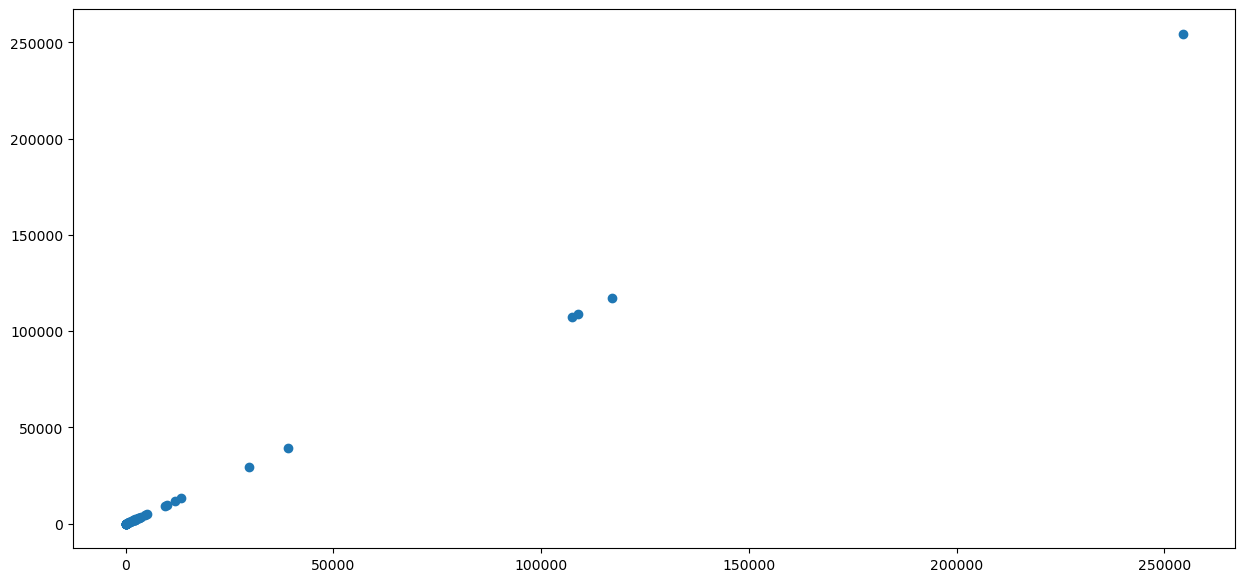

In [53]:
plt.figure(figsize=(15,7))
plt.scatter(y_test,predictions)

<Figure size 1500x700 with 0 Axes>

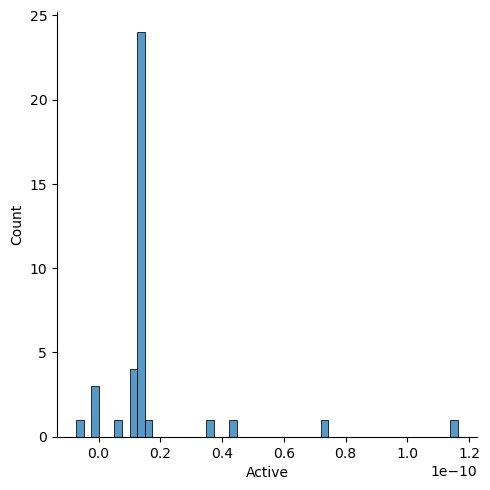

In [77]:
plt.figure(figsize=(15,7))
sns.displot((y_test-predictions),bins=50);

### MODEL EVALUATION

In [59]:
predictions = lm.predict(X_test)
rsme = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print('Root Mean Squared Error (RSME):',rsme)
print('R-squared:', r2)

Root Mean Squared Error (RSME): 2.75153466766236e-11
R-squared: 1.0


### Observations
- The model performance is evaluated using RMSE(Root Mean Square Error) and R- square.
- The RMSE shows the average difference between predicted and actual active cases i.e a lower RSME indicates better model performance.
- From the model, the RSME is 2.6978066909838375e-11 which means the model is performing well.
- The R- square shows how well the model explains the variance in the data with value closer to 1 indicating a better fit.
- Therefore, from the model, the R- square is 1 which shows a better fit. This could be due to data leakage or nature of the dataset.

In [60]:
print('Intercept:', lm.intercept_)
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lm.coef_
})
print('\nCoefficients:\n', coefficients)

Intercept: -2.9103830456733704e-11

Coefficients:
          Feature   Coefficient
0      Confirmed  1.000000e+00
1         Deaths -1.000000e+00
2      Recovered -1.000000e+00
3      New cases -3.032297e-15
4     New deaths -5.767760e-14
5  New recovered -2.789435e-15


### Observations
- The coefficient of Confirmed cases is 1, which means that an increase in confirmed cases by 1 increases the dependent variable 'active' by 1.
- The coefficient of Deaths is -1, which means that an increase in deaths by 1 decreases the dependent variable ;active' by 1.
- The coefficient of Recovered is -1, which means that an increase in recovered by 1 decreases the dependent variable 'active' by 1.
- The coeffcients of New cases, New deaths and New Recovered are  closer to 0, therefore they little effect on the prediciton.

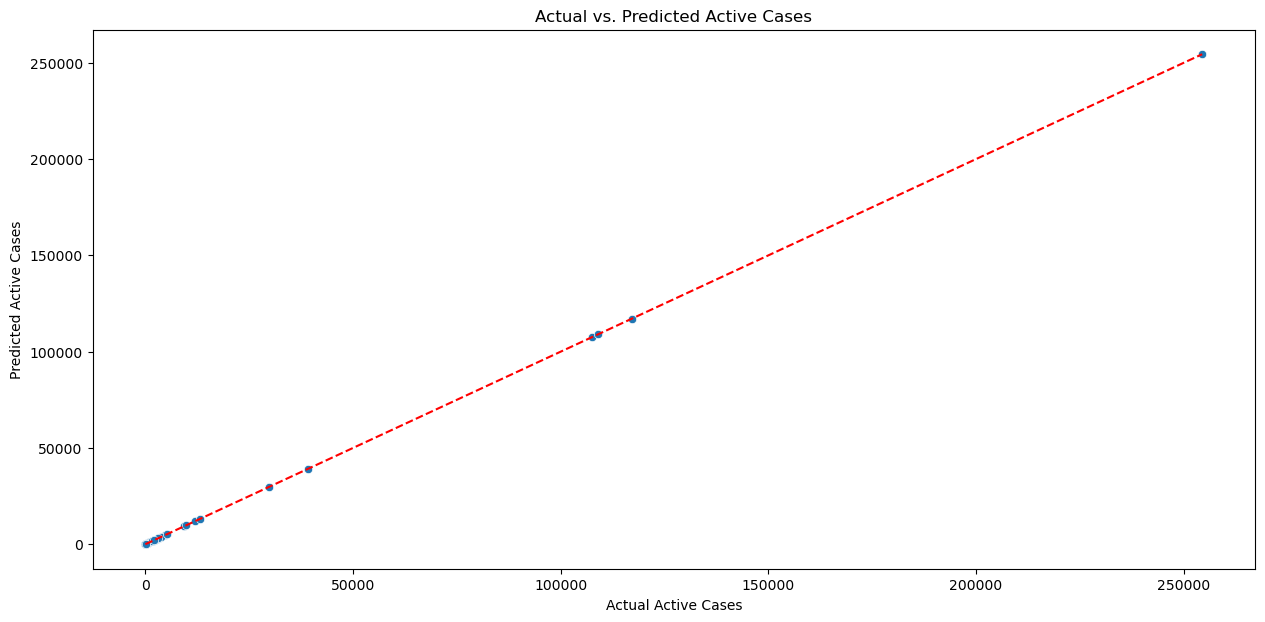

In [62]:
#Scatter plot of actual vs predicted active cases
plt.figure(figsize = (15,7))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Active Cases')
plt.ylabel('Predicted Active Cases')
plt.title('Actual vs. Predicted Active Cases')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--',color = 'red')
plt.show()

### Observations
- This shows the performance of the model
- The points are closer to the diagonal line which shows that the model prediciton align with the actual value

